# First Continuous Evaluation: The Wine Quality Dataset


This notebook template contains the enunciates of the exercises you have to solve in order to follow the continuous evaluation.

This evaluation is divided into 5 exercises. Each exercise have more than one sub-field. Please make at least one new code cell for each sub-field and a markdown cell for the explanation.

Comments in the code are welcomed.

The data needed to solve the exercises is in the following URL:

In [1]:
url = "https://github.com/f-guitart/data_mining/blob/master/data/wine_quality_errors.csv"
url2 = "../data/wine_quality_errors.csv"

**Question 1**

    a. Load the csv file as a DataFrame

In [2]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(url2, header=0, delimiter=';')
df.sample(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
891,891,7.2,0.660,0.03,2.3,0.078,16.0,86.0,-0.99743,NaN,NaN,9.7%,Q5
179,179,8.8,0.610,0.14,2.4,0.067,10.0,42.0,-0.99690,3.19,NaN,NaN,Q5
565,565,12.7,0.600,0.49,2.8,0.075,5.0,19.0,-0.99940,NaN,0.57,NaN,Q5
673,673,8.2,0.730,0.21,1.7,0.07400000000000001,5.0,13.0,-0.99680,NaN,0.52,NaN,Q5
1208,1208,7.2,0.360,0.46,2.1,0.07400000000000001,24.0,44.0,-0.99534,3.40,NaN,NaN,Q7
873,873,9.1,0.210,0.37,1.6,0.067,6.0,10.0,-0.99552,NaN,NaN,11.1%,Q7
694,694,9.0,0.470,0.31,2.7,0.084,24.0,125.0,-0.99840,3.31,NaN,NaN,Q5
737,737,8.2,0.590,0.00,2.5,0.09300000000000001,19.0,58.0,-1.00020,3.50,0.65,9.3%,Q6
200,200,9.6,0.320,0.47,1.4,0.055999999999999994,9.0,24.0,-0.99695,NaN,0.82,10.3%,Q7
909,909,7.3,0.305,0.39,1.2,0.059000000000000004,7.0,11.0,-0.99331,NaN,0.52,NaN,Q6


    b. Check the size of the dataset 

In [4]:
print ("Columns:", df.shape[1])
print ("Rows: ", df.shape[0])

Columns: 13
Rows:  1599


    c. Check the types of the variables

In [5]:
display(df.dtypes)

Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides                object
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                  object
dtype: object

**Question 2**

    a. After having checked variable types, ¿which ones you think are not correct? ¿why?

In [6]:
# Chlorides and Alcohot have not correct types. 
# Chlorides variable must be a float64, because it's a numeric decimal value
# Alcohol variable must be also a float64 because it's a percentage with decimals

    b. Provide the correct type to each variable transforming the dataset into a technical correct dataset

In [7]:
# We use raise to detect errors and correct data
# Commented after eliminate all errors
#df['chlorides'] = pd.to_numeric(df['chlorides'],errors='raise')

In [8]:
# Replace comma to point as decimal symbol
print ('Contains comma: ', df[df['chlorides'].str.contains('\'')].shape[0])
df['chlorides'] = df['chlorides'].str.replace('\'', '.')

Contains comma:  32


In [9]:
## Converts data type and confirm type conversion
df['chlorides'] = pd.to_numeric(df['chlorides'],errors='raise')
df.dtypes

Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                  object
dtype: object

In [10]:
# Try to convert to numeric and detect errors
# df['alcohol'] = pd.to_numeric(df['alcohol'], errors='raise')

In [11]:
# Delete percentage character
df['alcohol'] = df['alcohol'].str.rstrip('%')

In [12]:
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='raise')
df.dtypes

Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

    c. Regarding quality variable, which kind of variable is. is it correct to leave it as "string"?

In [13]:
# It's a good idea to remain it as 'string' because it's a qualitative variable with values between 'Q3' and 'Q5'

In [14]:
df['quality'].value_counts()

Q5    681
Q6    638
Q7    199
Q4     53
Q8     18
Q3     10
Name: quality, dtype: int64

**Question 3**

    a. Select the wines with highest quality using iloc and then measure the mean

In [15]:
## Highest quality
high = df[df["quality"]=='Q7']
high.head(5)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,-0.9946,NaN,0.47,NaN,Q7
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,-0.9968,3.36,0.57,NaN,Q7
16,16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,-0.9969,3.30,NaN,10.5,Q7
37,37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,-0.9968,NaN,0.73,9.7,Q7
62,62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,-0.9968,3.38,NaN,9.5,Q7


    b. Select the wines with lowest quality using loc and then measure the mean

In [16]:
## Lowest quality
low = df.loc[df["quality"]=='Q7']
low.head(5)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,-0.9946,NaN,0.47,NaN,Q7
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,-0.9968,3.36,0.57,NaN,Q7
16,16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,-0.9969,3.30,NaN,10.5,Q7
37,37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,-0.9968,NaN,0.73,9.7,Q7
62,62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,-0.9968,3.38,NaN,9.5,Q7


In [17]:
low.mean()

Unnamed: 0              831.165829
fixed acidity             8.872362
volatile acidity          0.403920
citric acid               0.375176
residual sugar            2.720603
chlorides                 0.076588
free sulfur dioxide      14.045226
total sulfur dioxide     35.020101
density                  -0.996104
pH                        3.287624
sulphates                 0.724757
alcohol                  11.401456
dtype: float64

    c. Group wines by quality and provide the mean, median, standard deviation and the 3 quartiles

In [18]:
df_group = df.groupby(["quality"])
df_group.groups.keys()

dict_keys(['Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'])

In [19]:
df_group['fixed acidity'].agg({'mean':np.mean,'median':np.median, 'standard dev':np.std, 
                               'q1':lambda a:np.percentile(a, q=25),
                               'q2':lambda a:np.percentile(a, q=50),
                               'q3':lambda a:np.percentile(a, q=75)})

C:\Java\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,mean,median,standard dev,q1,q2,q3
quality,,,,,,
Q3,8.360000,7.50,1.770875,7.15,7.50,9.875
Q4,7.779245,7.50,1.626624,6.80,7.50,8.400
Q5,8.167254,7.80,1.563988,7.10,7.80,8.900
Q6,8.347179,7.90,1.797849,7.00,7.90,9.400
Q7,8.872362,8.80,1.992483,7.40,8.80,10.100
Q8,8.566667,8.25,2.119656,7.25,8.25,10.225


    d. Provide the frequency table of quality variable

In [20]:
df['quality'].value_counts()

Q5    681
Q6    638
Q7    199
Q4     53
Q8     18
Q3     10
Name: quality, dtype: int64

**Question 4**

    a. There is one inconsistent variable. can you say which one is? hint: mass and volume can't be negative

In [21]:
## Density its the only variable related with volume
## All the values of density are negatives
display(df["density"].describe())
display((df["density"]<0).value_counts())

count    1599.000000
mean       -0.996747
std         0.001887
min        -1.003690
25%        -0.997835
50%        -0.996750
75%        -0.995600
max        -0.990070
Name: density, dtype: float64

True    1599
Name: density, dtype: int64

    b. You discover that the hydrometer is providing -x, where x is the correct measure, how would you correct the error

In [22]:
## Hydrometer mesures some variables about liquids. One of them is the density, that has incorrect negative values
## Changing negative to positives
df["density"]=-df["density"]

In [23]:
## Validating correction
df["density"].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

    c. For the nan values, provide the mean of the variable depending on the quality value. i.e. if quality is a and i have a nan value in var 1, provide the mean of var1 where quality is a

In [24]:
## columns with NaN 
print ("Columns with nulls:")
display (df.isnull().sum())

## rows with NaN
print ("Rows samples with nulls:")
nulls = df.isnull().sum(axis=1)
null_rows = df.loc[nulls==1]
display(null_rows.sample(10))

Columns with nulls:


Unnamed: 0                0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                      815
sulphates               835
alcohol                 814
quality                   0
dtype: int64

Rows samples with nulls:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1265,1265,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,NaN,Q6
857,857,8.2,0.260,0.34,2.5,0.073,16.0,47.0,0.99594,3.40,0.78,NaN,Q7
1294,1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,NaN,0.75,10.9,Q6
1319,1319,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,NaN,9.1,Q6
310,310,10.3,0.530,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,NaN,9.3,Q6
494,494,6.5,0.390,0.23,8.3,0.051,28.0,91.0,0.99520,NaN,0.55,12.1,Q6
1227,1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,NaN,0.72,9.6,Q5
226,226,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,NaN,9.5,Q6
9,9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,NaN,10.5,Q5
924,924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,NaN,Q5


In [25]:
#  Mean of variables grouped by quality
quality_means = df.pivot_table(index='quality',values=['pH','sulphates','alcohol'],aggfunc=np.mean)
display (quality_means)

,alcohol,pH,sulphates
quality,,,
Q3,9.387500,3.386667,0.622500
Q4,10.169048,3.365200,0.601471
Q5,9.863050,3.305937,0.631538
Q6,10.650974,3.320790,0.662862
Q7,11.401456,3.287624,0.724757
Q8,12.375000,3.228750,0.733750


In [26]:
#  Correction of NaN values with mean grouped by quality

for variable in quality_means.columns:
    for quality in quality_means.index:
        #  Group information 
        print ('VARIABLE:', variable)
        print ('QUALITY :', quality)
        null_q_index =df[(df.quality==quality) & (df[variable].isnull())].index
        print ('Nulls   :', null_q_index.size)
        
        #  Initial value
        print ('Initial values sample:')
        display(df.iloc[null_q_index].head(2))
        
        # Correction
        df.loc[(df.quality==quality) & (df[variable].isnull()), variable] = quality_means.loc[quality,variable]

        # Final value
        print ('Corrected values:')
        display(df.iloc[null_q_index].head(2))


VARIABLE: alcohol
QUALITY : Q3
Nulls   : 6
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
690,690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,NaN,NaN,Q3
832,832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,NaN,0.86,NaN,Q3


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
690,690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,NaN,9.3875,Q3
832,832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,NaN,0.86,9.3875,Q3


VARIABLE: alcohol
QUALITY : Q4
Nulls   : 32
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,NaN,NaN,NaN,Q4
41,41,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,NaN,Q4


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,NaN,NaN,10.169048,Q4
41,41,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,10.169048,Q4


VARIABLE: alcohol
QUALITY : Q5
Nulls   : 340
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,NaN,NaN,Q5
1,1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,NaN,NaN,NaN,Q5


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,NaN,9.86305,Q5
1,1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,NaN,NaN,9.86305,Q5


VARIABLE: alcohol
QUALITY : Q6
Nulls   : 330
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
19,19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,NaN,1.08,NaN,Q6
20,20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,NaN,Q6


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
19,19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,NaN,1.08,10.650974,Q6
20,20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,10.650974,Q6


VARIABLE: alcohol
QUALITY : Q7
Nulls   : 96
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,NaN,0.47,NaN,Q7
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,NaN,Q7


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,NaN,0.47,11.401456,Q7
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,11.401456,Q7


VARIABLE: alcohol
QUALITY : Q8
Nulls   : 10
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,NaN,NaN,NaN,Q8
440,440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,NaN,NaN,Q8


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,NaN,NaN,12.375,Q8
440,440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,NaN,12.375,Q8


VARIABLE: pH
QUALITY : Q3
Nulls   : 4
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,NaN,0.57,9.0000,Q3
832,832,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,NaN,0.86,9.3875,Q3


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.386667,0.57,9.0000,Q3
832,832,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.386667,0.86,9.3875,Q3


VARIABLE: pH
QUALITY : Q4
Nulls   : 28
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,NaN,NaN,10.169048,Q4
38,38,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940,NaN,0.48,9.800000,Q4


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.3652,NaN,10.169048,Q4
38,38,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940,3.3652,0.48,9.800000,Q4


VARIABLE: pH
QUALITY : Q5
Nulls   : 366
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,NaN,NaN,9.86305,Q5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,NaN,0.65,9.86305,Q5


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.305937,NaN,9.86305,Q5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.305937,0.65,9.86305,Q5


VARIABLE: pH
QUALITY : Q6
Nulls   : 309
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
19,19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,NaN,1.08,10.650974,Q6
24,24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,NaN,NaN,9.700000,Q6


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
19,19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.32079,1.08,10.650974,Q6
24,24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.32079,NaN,9.700000,Q6


VARIABLE: pH
QUALITY : Q7
Nulls   : 98
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,NaN,0.47,11.401456,Q7
37,37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,NaN,0.73,9.700000,Q7


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.287624,0.47,11.401456,Q7
37,37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.287624,0.73,9.700000,Q7


VARIABLE: pH
QUALITY : Q8
Nulls   : 10
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,NaN,NaN,12.375,Q8
278,278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,NaN,0.82,12.600,Q8


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.22875,NaN,12.375,Q8
278,278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.22875,0.82,12.600,Q8


VARIABLE: sulphates
QUALITY : Q3
Nulls   : 6
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
517,517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.9994,3.16,NaN,8.4000,Q3
690,690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.9966,3.63,NaN,9.3875,Q3


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
517,517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.9994,3.16,0.6225,8.4000,Q3
690,690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.9966,3.63,0.6225,9.3875,Q3


VARIABLE: sulphates
QUALITY : Q4
Nulls   : 19
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.3652,NaN,10.169048,Q4
45,45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9000,NaN,10.169048,Q4


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.3652,0.601471,10.169048,Q4
45,45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9000,0.601471,10.169048,Q4


VARIABLE: sulphates
QUALITY : Q5
Nulls   : 356
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.510000,NaN,9.86305,Q5
1,1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.305937,NaN,9.86305,Q5


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.510000,0.631538,9.86305,Q5
1,1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.305937,0.631538,9.86305,Q5


VARIABLE: sulphates
QUALITY : Q6
Nulls   : 348
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16000,NaN,9.8,Q6
24,24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.32079,NaN,9.7,Q6


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16000,0.662862,9.8,Q6
24,24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.32079,0.662862,9.7,Q6


VARIABLE: sulphates
QUALITY : Q7
Nulls   : 96
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,NaN,10.5,Q7
62,62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,NaN,9.5,Q7


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.724757,10.5,Q7
62,62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.724757,9.5,Q7


VARIABLE: sulphates
QUALITY : Q8
Nulls   : 10
Initial values sample:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.22875,NaN,12.375,Q8
390,390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56000,NaN,12.900,Q8


Corrected values:


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.22875,0.73375,12.375,Q8
390,390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56000,0.73375,12.900,Q8


    d. Check outliers in variables fixed acidity, volatile acidity, and citric acid using the Tukey's box-and-whiskers method 

In [27]:
iqr_func = lambda x: x.iloc[1]-x.iloc[0]
iqr = df[['fixed acidity','volatile acidity','citric acid']].quantile([.25,.5,.75]).apply(iqr_func)

In [28]:
## Quartils
display('* Quartils:', df[['fixed acidity','volatile acidity','citric acid']].quantile([.25,.5,.75]))

## Interquartile range
iqr_func = lambda x: x.iloc[1]-x.iloc[0]
iqr = df[['fixed acidity','volatile acidity','citric acid']].quantile([.25,.5,.75]).apply(iqr_func)
display('* IQR values:', iqr)

high_out = df[['fixed acidity','volatile acidity','citric acid']].quantile([.75]) + iqr*1.5
display('* High whiskers:', high_out)

low_out = df[['fixed acidity','volatile acidity','citric acid']].quantile([.25]) + iqr*1.5
display('* Low whiskers:', low_out)

'* Quartils:'

,fixed acidity,volatile acidity,citric acid
0.25,7.1,0.39,0.09
0.50,7.9,0.52,0.26
0.75,9.2,0.64,0.42


'* IQR values:'

fixed acidity       0.80
volatile acidity    0.13
citric acid         0.17
dtype: float64

'* High whiskers:'

,fixed acidity,volatile acidity,citric acid
0.75,10.4,0.835,0.675


'* Low whiskers:'

,fixed acidity,volatile acidity,citric acid
0.25,8.3,0.585,0.345


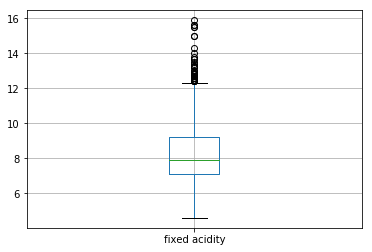

In [29]:
df.boxplot(column=['fixed acidity'],return_type='axes')
plt.show()

In [30]:
print('Fixed acidity: High outliers')
display(df[df['fixed acidity'] > high_out.loc[0.75,'fixed acidity']].head(5))
print('Fixed acidity: Low outliers')
display(df[df['fixed acidity'] < low_out.loc[0.25,'fixed acidity']].head(5))

Fixed acidity: High outliers


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.160000,0.662862,9.800000,Q6
197,197,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.9981,3.110000,0.970000,10.100000,Q6
205,205,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.9994,3.200000,0.724757,10.800000,Q7
206,206,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.9994,3.287624,0.724757,11.401456,Q7
209,209,11.0,0.30,0.58,2.1,0.054,7.0,19.0,0.9980,3.310000,0.880000,10.500000,Q7


Fixed acidity: Low outliers


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.510000,0.631538,9.86305,Q5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.305937,0.631538,9.86305,Q5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.305937,0.650000,9.86305,Q5
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.305937,0.560000,9.40000,Q5
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.510000,0.560000,9.86305,Q5


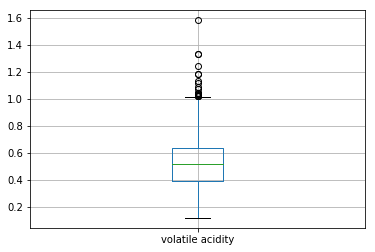

In [31]:
df.boxplot(column=['volatile acidity'],return_type='axes')
plt.show()

In [32]:
print('Volatile acidity: High outliers')
display(df[df['volatile acidity'] > high_out.loc[0.75,'volatile acidity']].head(5))
print('Volatile acidity: Low outliers')
display(df[df['volatile acidity'] < low_out.loc[0.25,'volatile acidity']].head(5))

Volatile acidity: High outliers


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.305937,0.631538,9.863050,Q5
38,38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.365200,0.480000,9.800000,Q4
46,46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.9970,3.305937,0.730000,9.200000,Q5
94,94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.9938,3.365200,0.601471,10.169048,Q4
98,98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.305937,0.631538,9.863050,Q5


Volatile acidity: Low outliers


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.662862,9.800000,Q6
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.570000,11.401456,Q7
9,9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.631538,10.500000,Q5
10,10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.540000,9.200000,Q5
11,11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.800000,9.863050,Q5


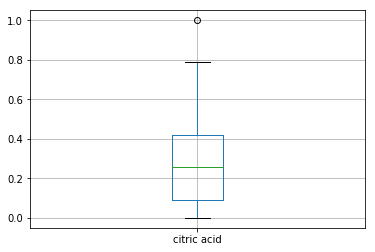

In [33]:
df.boxplot(column=['citric acid'],return_type='axes')
plt.show()

In [34]:
print('Citric acid: High outliers')
display(df[df['citric acid'] > high_out.loc[0.75,'citric acid']].head(5))
print('Citric acid: Low outliers')
display(df[df['citric acid'] < low_out.loc[0.25,'citric acid']].head(5))

Citric acid: High outliers


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
81,81,7.8,0.43,0.70,1.9,0.464,22.0,67.0,0.9974,3.305937,0.631538,9.863050,Q5
106,106,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.9973,3.080000,0.631538,9.300000,Q5
151,151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,3.365200,2.000000,10.169048,Q4
205,205,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.9994,3.200000,0.724757,10.800000,Q7
206,206,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.9994,3.287624,0.724757,11.401456,Q7


Citric acid: Low outliers


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.510000,0.631538,9.86305,Q5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.305937,0.631538,9.86305,Q5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.305937,0.650000,9.86305,Q5
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.305937,0.560000,9.40000,Q5
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.510000,0.560000,9.86305,Q5


**Question 5**

    a. Plot the distribution of  chlorides

In [35]:
df["chlorides"].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

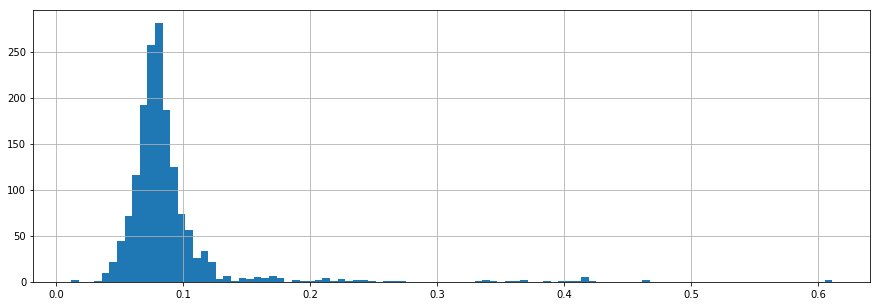

In [36]:
fig = plt.figure(figsize = (15,5))
df["chlorides"].hist(bins=100)
plt.show()

    b. Plot the distribution of quality

In [37]:
##  Frequency distribution of varialbe 'quality'
quality_dist = df["quality"].value_counts().sort_index()
quality_dist

Q3     10
Q4     53
Q5    681
Q6    638
Q7    199
Q8     18
Name: quality, dtype: int64

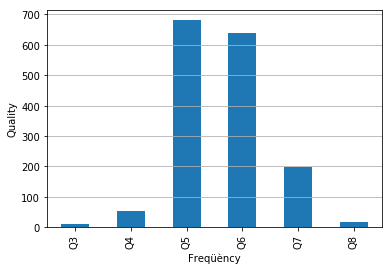

In [38]:
##  Plot of distribution
ax = quality_dist.plot(kind="bar", grid=True)
ax.set_xlabel("Freqüèncy")
ax.set_ylabel("Quality")
ax.grid("off", which="major", axis="x")
plt.show()

    c. Plot the distribution of alcohol but not taking highest and lowest qualities


In [39]:
alcohol_filtered = df[-df['quality'].isin(['Q3','Q8']) ]['alcohol']

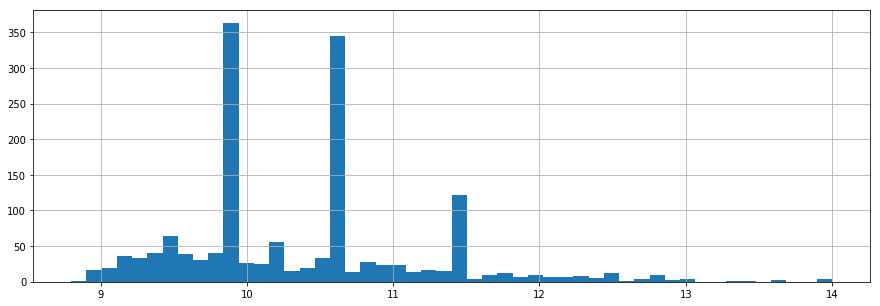

In [40]:
fig = plt.figure(figsize = (15,5))
alcohol_filtered.hist(bins=50)
plt.show()

    d. Compare sulphates and alcohol in an scatter plot. then use quality as third dimension

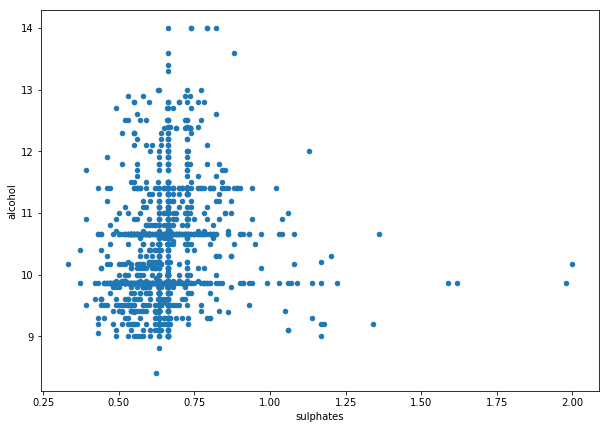

In [41]:
ax = df.plot.scatter(x='sulphates',y='alcohol',figsize = (10,7))
plt.show()

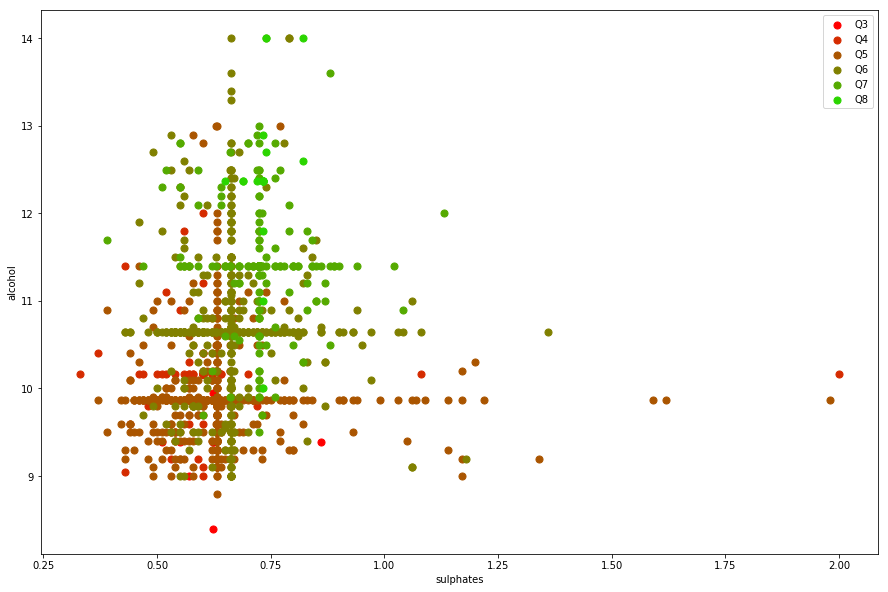

In [42]:
from matplotlib import colors as mcolors

i = 0
max = quality_dist.size
for quality in quality_dist.keys():
    color = ((max-i)/max, i/max, 0)
    df_q = df[df['quality']==quality]
    if (i==0):
        ax = df_q.plot.scatter(x='sulphates',y='alcohol',label=quality,c=color,figsize = (15,10), s=50)
    else:
        df_q.plot.scatter(x='sulphates',y='alcohol',label=quality,c=color,ax=ax, s=50)
    i=i+1
plt.show()

In [43]:
## Best quality wines have high amount of alcohol but low amount of sulphates